# Notion

本notebookは[AtomisticSimulationTutorial](https://docs.matlantis.com/atomistic-simulation-tutorial/ja/)をGoogleColab上で実行するために修正したものであり、一般的なライブラリで実行可能な部分だけを提供しております。

# Diatomic Potential

2体ポテンシャルエネルギーとは、真空中に2つの原子だけを置いたときの相互作用のエネルギーです。原子間距離によって値が変わります。

## 水素分子の2体Potential energyを計算してみる

ここまで習ったことを利用して、水素分子の２体ポテンシャルエネルギーを計算してみましょう。

水素原子間が様々な距離になるように水素分子を生成しそのエネルギーを計算、プロットしてみます。

## Initial setup

In [1]:
!pip install ase

Looking in indexes: https://pypi.org/simple, http://pypi.artifact.svc:8080/simple

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from ase.calculators.emt import EMT

calculator = EMT()

In [3]:
import numpy as np
from tqdm.auto import tqdm
from ase import Atoms

distances = np.linspace(0.3, 6.5, 100)
energy_list = []
for d in tqdm(distances):
    atoms = Atoms("H2", [[0, 0, 0], [0, 0, d]])
    atoms.calc = calculator
    E_pot = atoms.get_potential_energy()
    energy_list.append(E_pot)

energies = np.array(energy_list)

  0%|          | 0/100 [00:00<?, ?it/s]

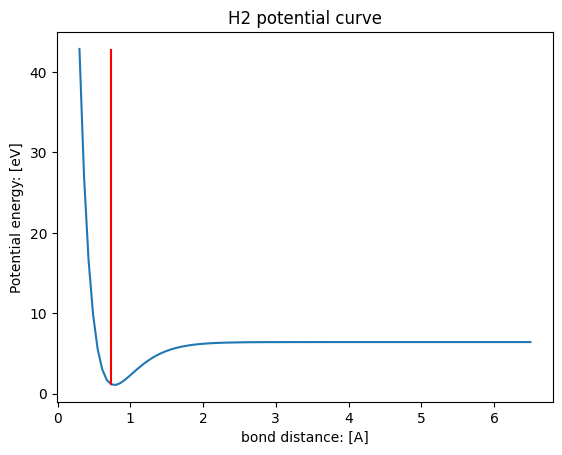

In [4]:
import matplotlib.pyplot as plt


plt.plot(distances, energies)
# H2 bond length = 0.74A
plt.vlines(0.74, np.min(energies), np.max(energies), color="red")
plt.xlabel("bond distance: [A]")
plt.ylabel("Potential energy: [eV]")
plt.title("H2 potential curve")
plt.show()

In [5]:
distances[np.argmin(energies)]

0.801010101010101

同じ水素原子2つからなる水素分子でも原子間距離が変わるだけでそのエネルギーは大きく異なることがわかります。<br/>
実験的には水素分子は結合長さ 0.74A で最安定であるということが知られていますが、実際にEMTで計算を行ってみると比較的近い位置でエネルギーが一番低くなっていることが確認できました。

このように、様々な構造に対してエネルギーが計算できることで、自然界で物質がどのような構造を取っているのかを解析することができます。